<a href="https://colab.research.google.com/github/Shihab7u/Brain-Tumor-Classification-1/blob/main/CovBi_GRU_(Dataset_1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install matplotlib_inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW/view?usp=share_link

Downloading...
From (original): https://drive.google.com/uc?id=1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW
From (redirected): https://drive.google.com/uc?id=1nt6PoC3EUD1F4Ct9xYa7fEs86aM58LHW&confirm=t&uuid=45b7d1e1-6d80-48a4-90dd-60e5c5f5d934
To: /content/BRAIN_DATA.zip
100% 879M/879M [00:05<00:00, 159MB/s]


In [ ]:
!unzip "/content/BRAIN_DATA.zip" > /dev/null  #-d "/content/Brain Tumor Dataset"

replace BRAIN_DATA/1.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [ ]:
# Now Take All the data into a list
data_dir='/content/BRAIN_DATA'
total_image=3064
trainindata=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  trainindata.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [ ]:
trainindata[0]["cjdata"]["image"]

<HDF5 dataset "image": shape (512, 512), type "<i2">

In [ ]:
import keras
import random
random.shuffle(trainindata)

In [ ]:
import numpy as np
 # Now take all the image as train and test
trainx=[]
trainy=[]
testx=[]
testy=[]

size=round(4*total_image/5) # Split the dataset into 80:20
# For trainx and trainy
for i in range(size):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    trainx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    trainy.append(label)
# For trainx and trainy
for i in range(size,total_image):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    testx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    testy.append(label)

In [ ]:
# Converting list to numpy array
trainx=np.array(trainx).reshape(-1,512,512)
testx=np.array(testx).reshape(-1,512,512)
trainy=np.array(trainy)
testy=np.array(testy)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2438, 512, 512)
(611, 512, 512)
(2438,)
(611,)


In [ ]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Conv1D,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv1D(64, 4, activation='relu', input_shape = (512,512))) #3 Conv1D
model.add(MaxPooling1D(pool_size=2)) #2
model.add(BatchNormalization())
# # model.add(Dropout(0.2))

model.add(Bidirectional(GRU(64, return_sequences=True)))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
# # model.add(Dropout(0.2))


model.add(Bidirectional(GRU(128, return_sequences=True)))

model.add(Conv1D(128, 2, activation='relu')) #2
#model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
# #model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation='relu')) #128
model.add(Dropout(0.2)) #0.3
model.add(BatchNormalization())
model.add(Dense(128, activation='softmax')) #128

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 509, 64)           131136    
                                                                 
 max_pooling1d (MaxPooling1  (None, 254, 64)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 254, 64)           256       
 Normalization)                                                  
                                                                 
 bidirectional (Bidirection  (None, 254, 128)          49920     
 al)                                                             
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 64)           24640     
                                                        

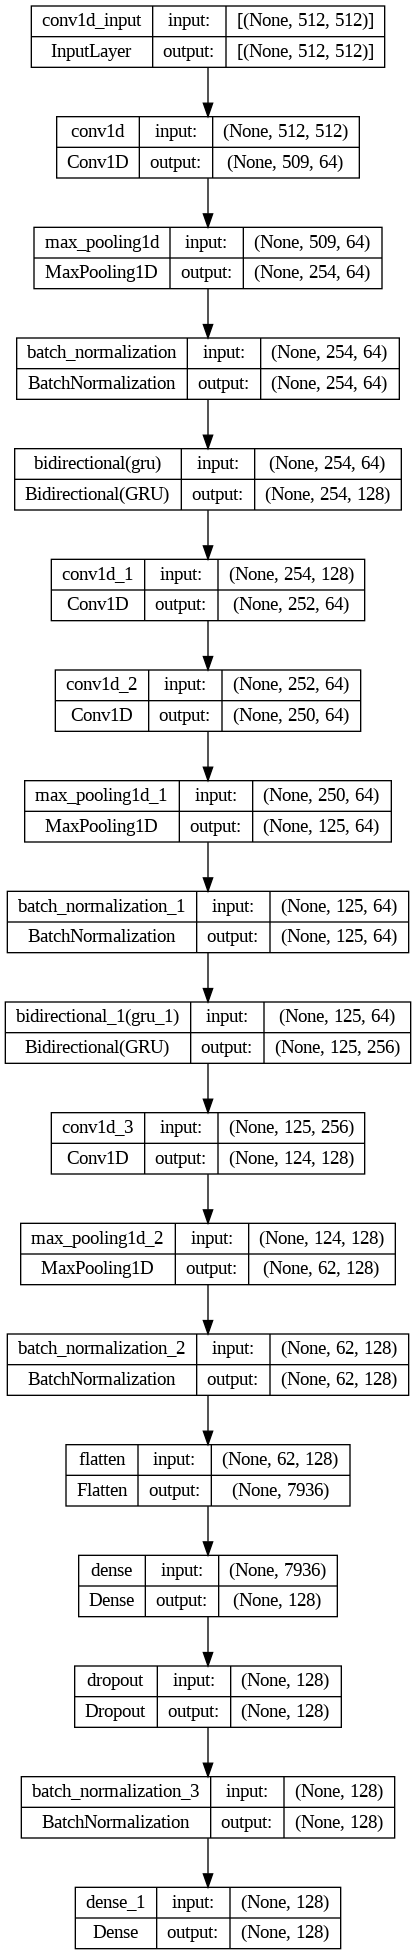

In [ ]:
# plot model architecture
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='CNN + BiGRU_architecture.png')

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
r=model.fit(trainx,
          trainy,
          epochs=80,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False
          )

Epoch 1/80
77/77 [==============================] - 16s 86ms/step - loss: 1.5568 - accuracy: 0.7502 - val_loss: 3.2446 - val_accuracy: 0.6448
Epoch 2/80
77/77 [==============================] - 4s 47ms/step - loss: 0.5047 - accuracy: 0.8708 - val_loss: 1.8671 - val_accuracy: 0.6890
Epoch 3/80
77/77 [==============================] - 4s 48ms/step - loss: 0.3046 - accuracy: 0.9053 - val_loss: 2.0105 - val_accuracy: 0.6088
Epoch 4/80
77/77 [==============================] - 4s 47ms/step - loss: 0.2076 - accuracy: 0.9381 - val_loss: 0.4314 - val_accuracy: 0.8756
Epoch 5/80
77/77 [==============================] - 4s 54ms/step - loss: 0.1496 - accuracy: 0.9467 - val_loss: 0.5948 - val_accuracy: 0.8511
Epoch 6/80
77/77 [==============================] - 3s 45ms/step - loss: 0.1056 - accuracy: 0.9668 - val_loss: 0.2427 - val_accuracy: 0.9100
Epoch 7/80
77/77 [==============================] - 4s 46ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.3831 - val_accuracy: 0.9034
Epoch 8/80
7

In [ ]:

def plot_loss_curves_mplt(history,

                          fill_a=0,
                          with_best_point=False,
                          plt_style="seaborn-v0_8-whitegrid",
                          start_epoch=1,
                          figsize = (20, 8)
                          ):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]


    accuracy = history.history["accuracy"]

    val_accuracy = history.history["val_accuracy"]


    epochs = range(start_epoch, len(history.history["loss"])+1)

    index_loss = np.argmin(val_loss)  # This is the epoch with the lowest validation loss
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_accuracy)
    acc_highest = val_accuracy[index_acc]

    sc_label = 'Best epoch = ' + str(index_loss + start_epoch)
    vc_label = 'Best epoch = ' + str(index_acc + start_epoch)

    plt.figure(figsize=figsize, facecolor='white')
    plt.style.use(plt_style)

    # Plot loss
    plt.subplot(1, 2, 1)
    ax1 = plt.gca()  # Get the current axis
    ax1.plot(epochs, loss, '#008000', label='Training loss', linewidth=4)
    ax1.plot(epochs, val_loss,  "#FE0000", label='Validation loss', linewidth=4)
    if fill_a:
        ax1.fill_between(epochs, val_loss, loss, color='gray', alpha=fill_a)
    ax1.set_title("Training and Validation Loss", fontsize=20)
    ax1.set_xlabel("Epochs", fontsize=20)
    ax1.set_ylabel("Loss", fontsize=20)
    ax1.set_xlim([0.5, len(epochs)])
    # Plot best point
    if with_best_point:
        ax1.scatter(index_loss + start_epoch, val_lowest, s=150, c='blue', label=sc_label)
    ax1.legend(fontsize=18, loc='upper right', frameon=False)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    ax2 = plt.gca()  # Get the current axis
    ax2.plot(epochs, accuracy, '#008000',  label='Training Accuracy', linewidth=4)
    ax2.plot(epochs, val_accuracy,"#FE0000", label='Validation Accuracy', linewidth=4)
    if fill_a:
        ax2.fill_between(epochs, val_accuracy, accuracy, color='gray', alpha=fill_a)
    ax2.set_title("Training and Validation Accuracy", fontsize=20)
    ax2.set_xlabel("Epochs", fontsize=20)
    ax2.set_ylabel("Accuracy", fontsize=20)
    ax2.set_xlim([0.5, len(epochs)])
    ax2.set_ylim([0, 1.1])
    # Plot best point
    if with_best_point:
        ax2.scatter(index_acc + start_epoch, acc_highest, s=150, c='blue', label=vc_label)
    ax2.legend(fontsize=18, loc='lower right', frameon=False)

    plt.tight_layout()
    plt.show()

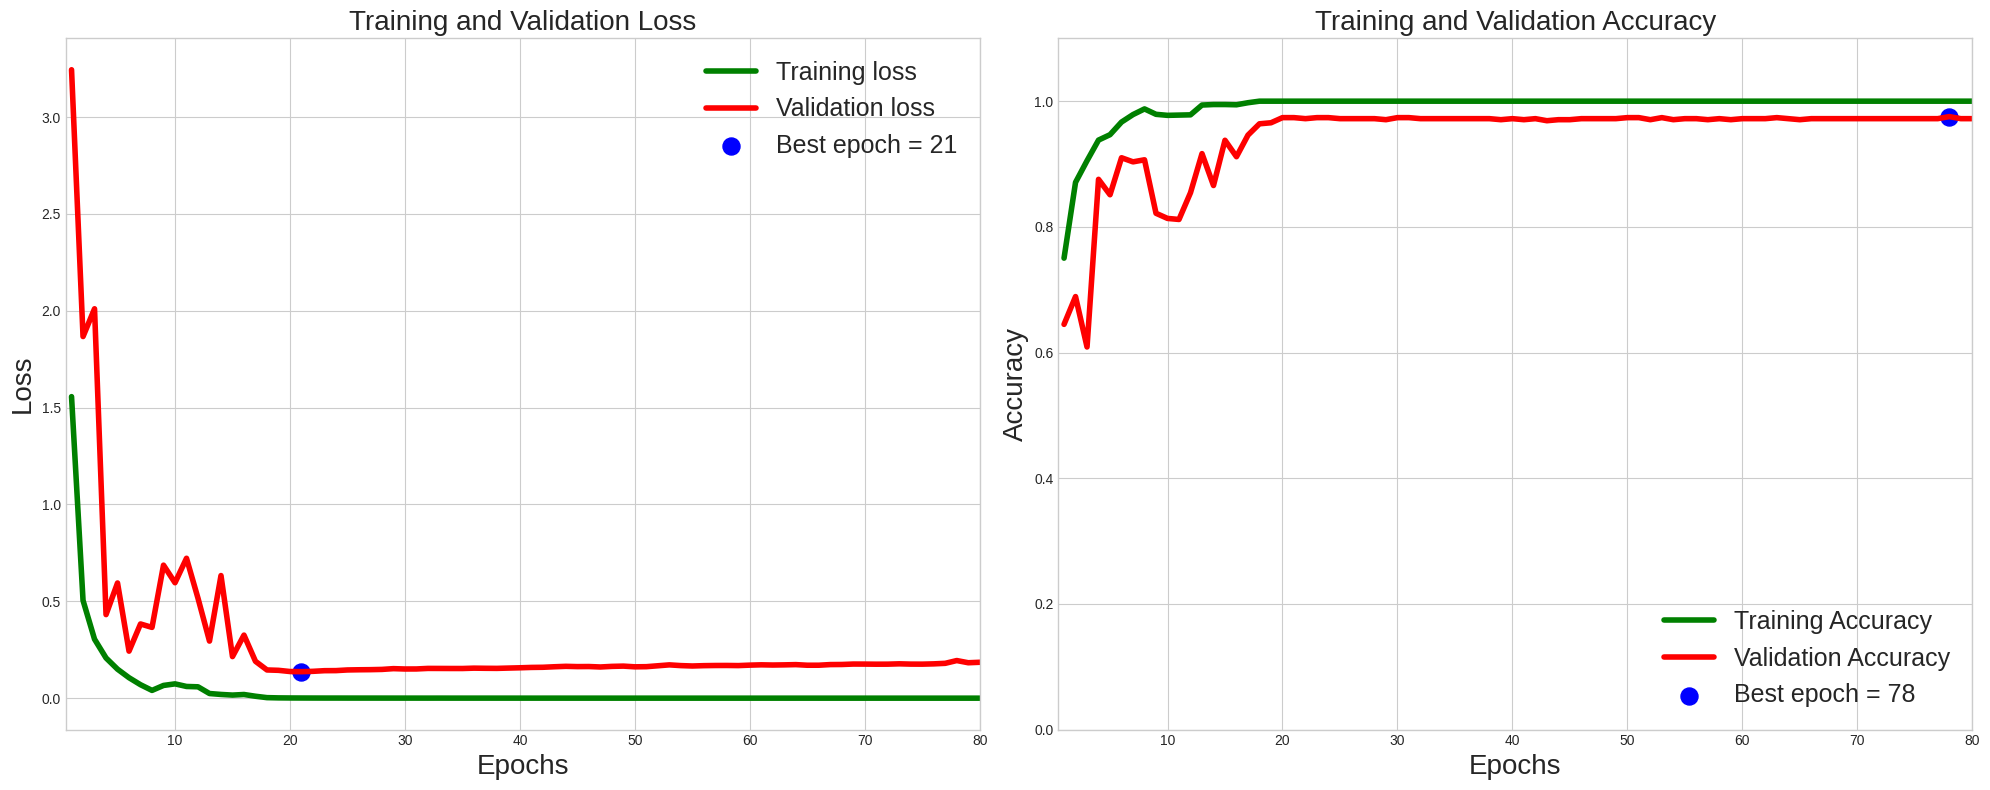

In [ ]:
plot_loss_curves_mplt(r, with_best_point=True)

In [ ]:
pred=model.predict(testx)
Y_pred = np.argmax(pred, 1)

20/20 [==============================] - 2s 25ms/step


In [ ]:
Y_pred.shape

(611,)

In [ ]:
testy.shape

(611,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(testy, Y_pred))

Confusion Matrix
[[152   5   3]
 [  9 267   0]
 [  0   0 175]]


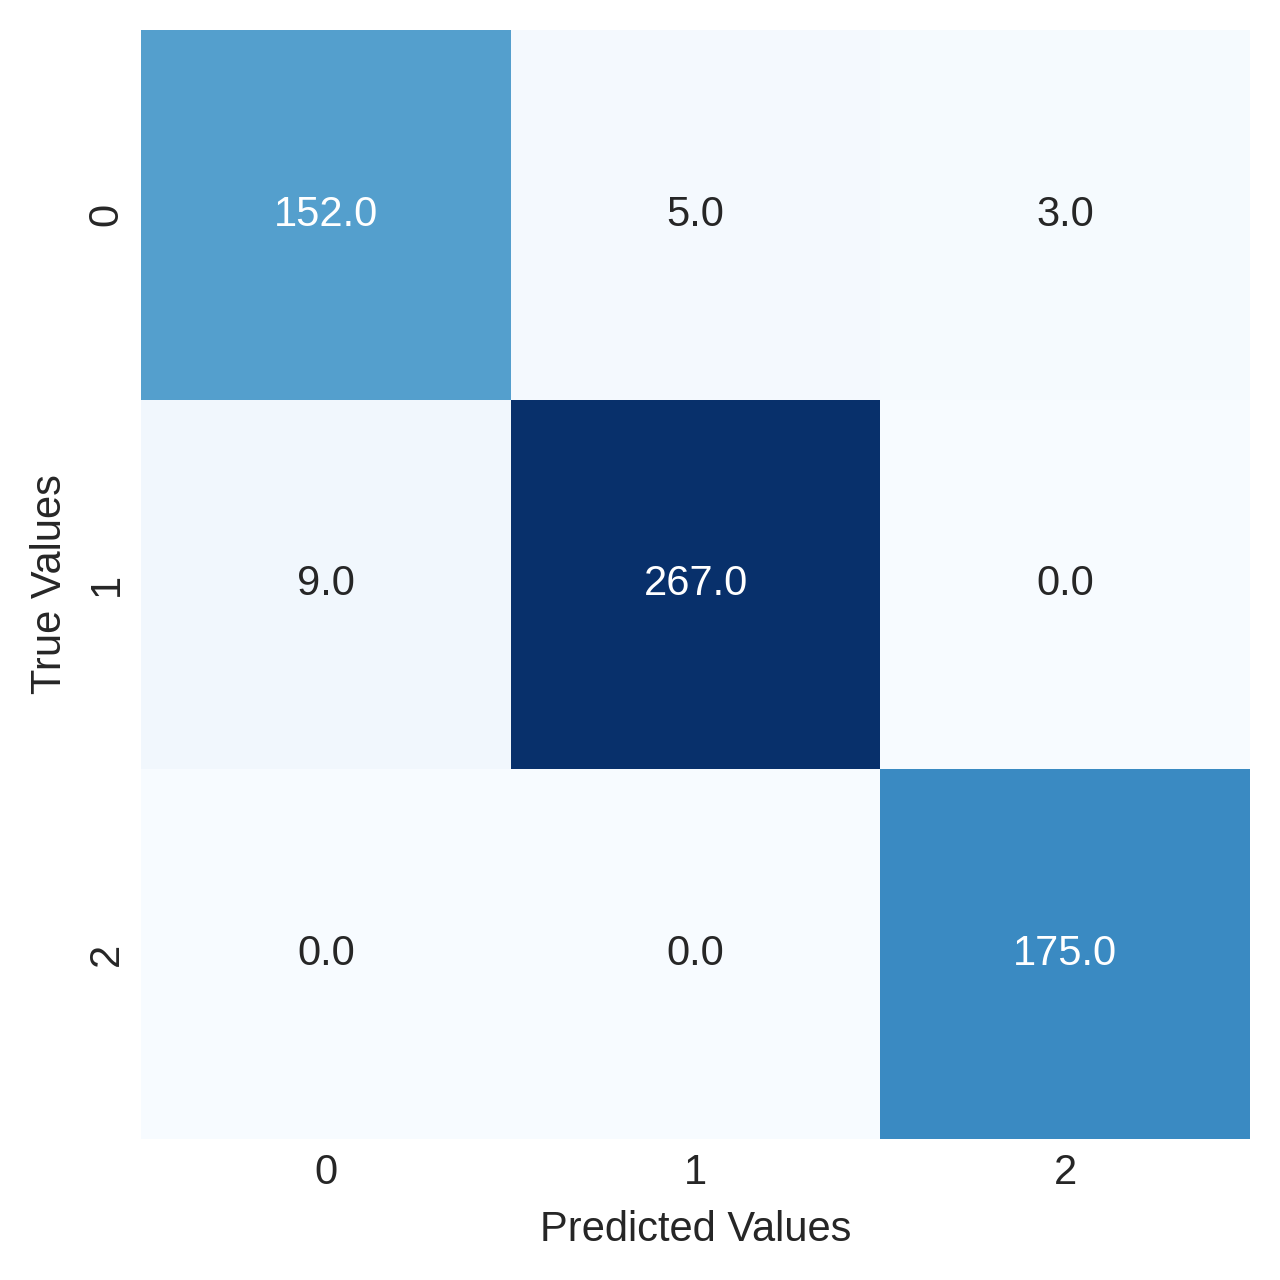

In [ ]:
import seaborn as sns
cm=confusion_matrix(testy, Y_pred)
plt.figure(dpi=300),sns.heatmap(cm, square=True, annot=True, fmt=".1f", cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [ ]:
print('Classification Report')
target_names = ['Meningioma', 'Glioma', 'Pituitary']
print(classification_report(testy, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  Meningioma       0.94      0.95      0.95       160
      Glioma       0.98      0.97      0.97       276
   Pituitary       0.98      1.00      0.99       175

    accuracy                           0.97       611
   macro avg       0.97      0.97      0.97       611
weighted avg       0.97      0.97      0.97       611



In [ ]:
print(trainy)

[1 1 1 ... 1 2 2]


[Text(0, 0.5, 'Meningioma'), Text(0, 1.5, 'Glioma'), Text(0, 2.5, 'Pituitary')]

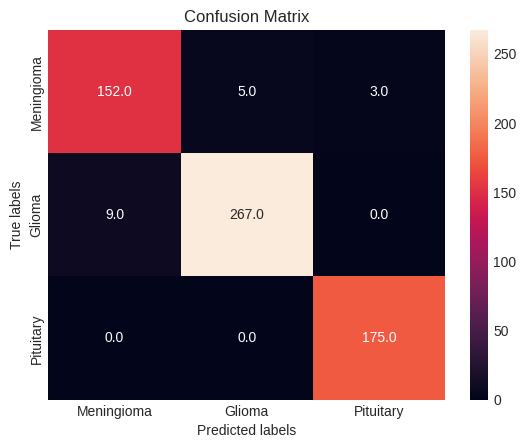

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax= plt.subplot()
plt.figure(dpi=300),sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary']); ax.yaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary'])


Confusion Matrix :
[[152   5   3]
 [  9 267   0]
 [  0   0 175]]
Accuracy Score : 0.972176759410802
Report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       160
           1       0.98      0.97      0.97       276
           2       0.98      1.00      0.99       175

    accuracy                           0.97       611
   macro avg       0.97      0.97      0.97       611
weighted avg       0.97      0.97      0.97       611



(<Figure size 1920x1440 with 2 Axes>, <Axes: >)

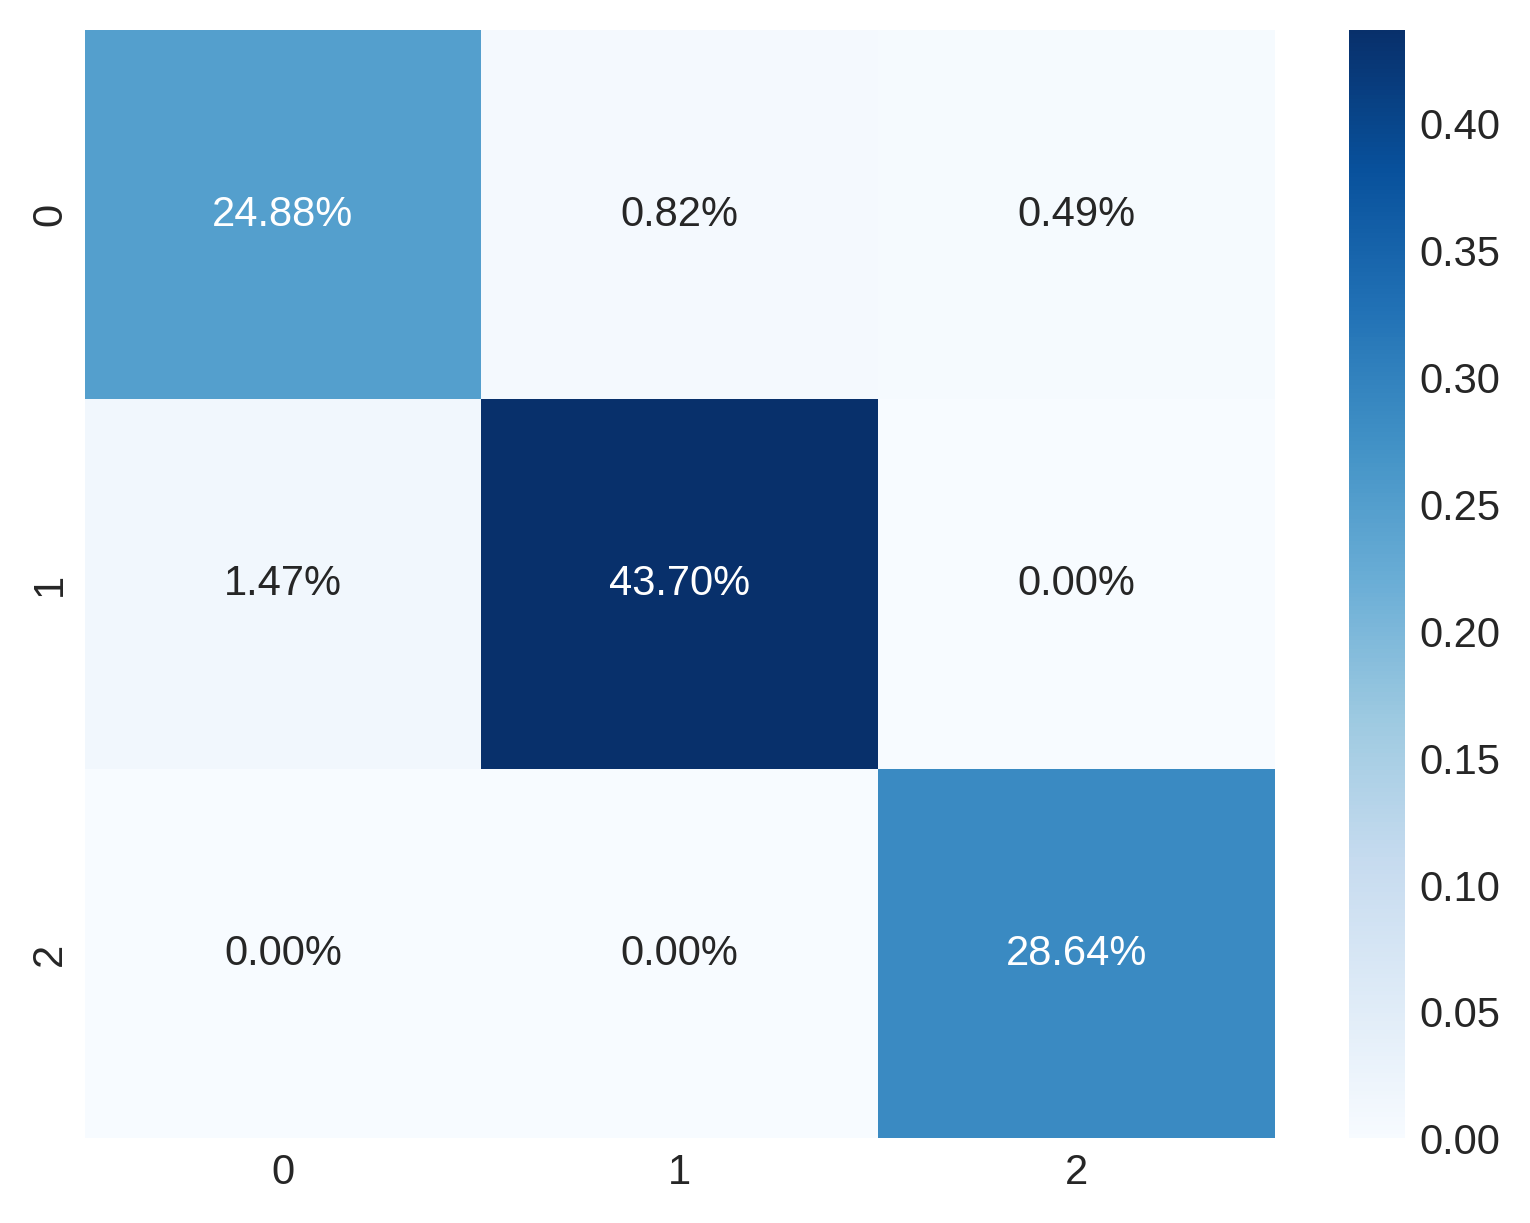

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(testy,Y_pred)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(testy,Y_pred))
print('Report : ')
print(classification_report(testy,Y_pred))

plt.figure(dpi=300),sns.heatmap(results/np.sum(results), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, Y_pred, pos_label=2)
metrics.auc(fpr, tpr)


0.9965596330275229

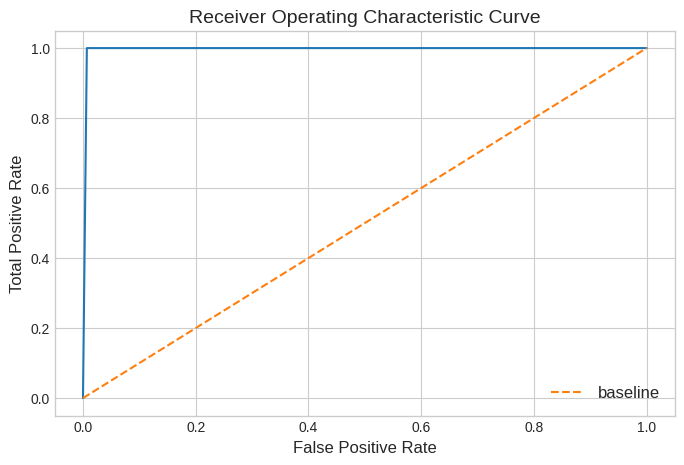

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);
